### Joining Data

We start by cleaning the data from 'cell_phones_total.csv' exactly as we did in HW3, and we take look at the table. 

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
df1=pd.read_csv('cell_phones_total.csv')
df1.loc[:,'1960']=df1['1960'].fillna(0)
df1=df1.ffill(axis=1)
for column in [col for col in df1.columns if col != 'iso-3']:
    for index in df1.index:
        try:
            df1.loc[index,column]=df1.loc[index, column].replace('k','e3')
            df1.loc[index,column]=df1.loc[index, column].replace('M','e6')
            df1.loc[index,column]=df1.loc[index, column].replace('B','e9')
        except AttributeError:
            continue     
    df1[column]=pd.to_numeric(df1[column], errors='coerce')
df1.head()

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132000.0,132000.0,135000.0,139000.0,140000.0,141000.0,141000.0,141000.0,141000.0,141000.0
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10200000.0,13800000.0,15300000.0,16800000.0,18400000.0,19700000.0,21600000.0,23900000.0,22000000.0,22600000.0
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9400000.0,12100000.0,12800000.0,13300000.0,14100000.0,13900000.0,13000000.0,13300000.0,13300000.0,14800000.0
3,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2690000.0,3100000.0,3500000.0,3690000.0,3360000.0,3400000.0,3370000.0,3630000.0,2710000.0,2630000.0
4,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65500.0,65000.0,63900.0,63900.0,66200.0,71300.0,76100.0,80300.0,82600.0,87900.0


We now want to also fill in the data in the file 'pop_data.csv'. We can however not do this the same way as in the earlier example since it is highly unlikely that a NaN value in reality would be 0. We instead check and see that the only cell in the column '2019' that is empty is INX and since we can see that 'df1 contains INX' is not printed out so will this mean that df1 don't even have a row 'INX' so we can just remove this from df2. Then we just fill out the dataframe from right to left with bfill. 

In [272]:
df2 = pd.read_csv('pop_data.csv')

NaNindex=0
for index in df2[df2['2019'].isna()].index:
    print(df2.iloc[index]['iso-3'])
    NaNindex=index

INX


In [273]:
if df1[df1['iso-3']=='INX'].empty:
    df2=df2.drop(NaNindex)
else:
    print('df1 contains INX')

In [126]:
df2.bfill(axis=1)
df2.head()

,Unnamed: 0,iso-3,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0
1,1,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0
2,2,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0
3,3,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0
4,4,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0


We can see that we have a column 'Unnamed: 0' that is unecessary so we remove it. We then use the melt function on both df1 and df2 to then be able to merge them through the 'year' and 'iso-3' columns.

In [127]:
df2=df2.drop('Unnamed: 0', axis=1)
df2=pd.melt(df2, id_vars = 'iso-3', var_name='year', value_name='population')
df2

,iso-3,year,population
0,ABW,1960,54608.0
1,AFE,1960,130692579.0
2,AFG,1960,8622466.0
3,AFW,1960,97256290.0
4,AGO,1960,5357195.0
...,...,...,...
16160,XKX,2020,1790133.0
16161,YEM,2020,32284046.0
16162,ZAF,2020,58801927.0
16163,ZMB,2020,18927715.0


We can see the result below. 

In [137]:
df1=pd.melt(df1, id_vars = 'iso-3', var_name='year', value_name='n_cellphones')
df3=pd.merge(df1,df2, on=['year','iso-3'])
df3.head()

,iso-3,year,n_cellphones,population
0,ABW,1960,0.0,54608.0
1,AFG,1960,0.0,8622466.0
2,AGO,1960,0.0,5357195.0
3,ALB,1960,0.0,1608800.0
4,AND,1960,0.0,9443.0


We take a look at the dataframe in 'country_data.csv'. 

In [160]:
df4 = pd.read_csv('country_data.csv')
df4.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


We can see that we only are interested in the columns 'name' and 'alpha-3' so we select them and merge them with df3 through the 'iso-3' and 'alpha-3' columns. We then create a new column 'phone_per_capita' and select this column together with 'year' and 'name' to become the new df5 and then we use the pivot function to restructure this dataframe as in the picture below, even though we have ordered the table below based on the highest number of phones per capita. 

In [166]:
df4=df4[['name','alpha-3']]
df5=pd.merge(df3, df4, left_on='iso-3', right_on='alpha-3')

df5['phone_per_capita']=df5['n_cellphones']/df5['population']
df5=df5[['name', 'year', 'phone_per_capita']]

df5=pd.pivot(df5, index='year', columns='name', values='phone_per_capita')
df5.sort_values('2019', axis=1,ascending=False).tail().iloc[:, :5]

name,Macao,Hong Kong,United Arab Emirates,Antigua and Barbuda,Seychelles
year,,,,,
2015,3.088231,2.290401,2.007424,1.956838,1.584260
2016,3.143510,2.398931,2.212521,1.987545,1.605459
2017,3.210102,2.488773,2.183431,2.019337,1.742433
2018,3.348741,2.670209,2.199084,2.008164,1.849900
2019,3.284849,2.863650,2.127739,1.997460,1.987196


For these five countrise so will we make a plot over the developement of phones per capita the last 10 years. 

<Axes: xlabel='year'>

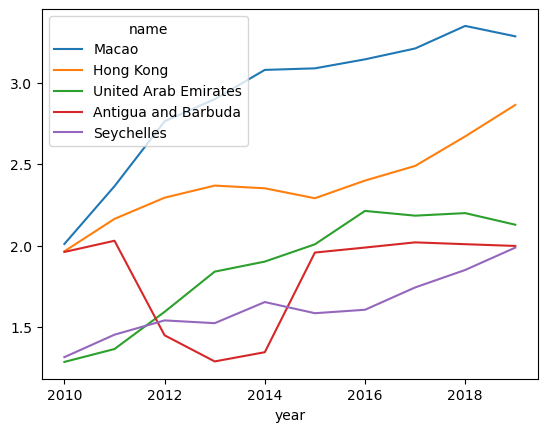

In [169]:
df6=df5.sort_values('2019',axis=1,ascending=False).tail(10).iloc[:, :5]
df6.plot()

### SQL

We select the database 'user_actions.db' and take a look on it. 

In [216]:
import sqlite3
from tabulate import tabulate

con = sqlite3.connect('user_actions.db')
cur=con.cursor()
cur.execute("SELECT sql FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()

for table in tables:
    print(table[0])

CREATE TABLE user_actions (
    user_id INTEGER,
    username TEXT,
    email TEXT,
    action TEXT,
    timestamp TEXT
)


We select the usernames of all users who have used the action 'signup'. 

In [217]:
cur.execute("select distinct username from user_actions where action='signup';")
rows = cur.fetchall()
headers = ["sign_up_usernames"]
print(tabulate(rows, headers=headers, tablefmt = "grid"))

+---------------------+
| sign_up_usernames   |
+=====================+
| user34              |
+---------------------+
| user28              |
+---------------------+
| user1               |
+---------------------+
| user24              |
+---------------------+
| user15              |
+---------------------+
| user20              |
+---------------------+
| user18              |
+---------------------+
| user25              |
+---------------------+
| user3               |
+---------------------+
| user9               |
+---------------------+
| user27              |
+---------------------+
| user16              |
+---------------------+
| user17              |
+---------------------+
| user4               |
+---------------------+
| user8               |
+---------------------+
| user13              |
+---------------------+
| user19              |
+---------------------+
| user31              |
+---------------------+
| user10              |
+---------------------+
| user23        

We select the user_id, username and number of log_entries for each user. 

In [218]:
cur.execute("select user_id, username, count(*) from user_actions group by user_id;")
rows = cur.fetchall()
headers = ["user_id", "username", "log_counter"]
print(tabulate(rows, headers=headers, tablefmt = "grid"))

+-----------+------------+---------------+
|   user_id | username   |   log_counter |
+===========+============+===============+
|         1 | user1      |           104 |
+-----------+------------+---------------+
|         2 | user2      |           149 |
+-----------+------------+---------------+
|         3 | user3      |           108 |
+-----------+------------+---------------+
|         4 | user4      |           436 |
+-----------+------------+---------------+
|         5 | user5      |           192 |
+-----------+------------+---------------+
|         6 | user6      |           457 |
+-----------+------------+---------------+
|         7 | user7      |           362 |
+-----------+------------+---------------+
|         8 | user8      |           329 |
+-----------+------------+---------------+
|         9 | user9      |           118 |
+-----------+------------+---------------+
|        10 | user10     |           170 |
+-----------+------------+---------------+
|        11

We select the user_id and username of all users who have done the actions 'sign_up' and 'login' on the same day. 

In [219]:
cur.execute("select distinct u1.user_id, u1.username from user_actions as u1 join user_actions as u2 on u1.user_id=u2.user_id and date(u1.timestamp)=date(u2.timestamp) where u1.action='signup' and u2.action='login';")
rows = cur.fetchall()
headers = ["user_id", "username"]
print(tabulate(rows, headers=headers, tablefmt = "grid"))
con.close

+-----------+------------+
|   user_id | username   |
+===========+============+
|         8 | user8      |
+-----------+------------+
|        12 | user12     |
+-----------+------------+
|        30 | user30     |
+-----------+------------+
|         7 | user7      |
+-----------+------------+
|        22 | user22     |
+-----------+------------+
|         5 | user5      |
+-----------+------------+
|         2 | user2      |
+-----------+------------+
|        32 | user32     |
+-----------+------------+


<function Connection.close()>

### Regex

We select the textfile 'comments.txt' and store each line in the file as an element in the list 'lines'. We select structures in the first line that satisfy that they start with a # and then consists of letters or number. 

In [266]:
import re

file = open("comments.txt", encoding = "utf-8")
lines = file.readlines()

pattern1 = r"#\w+"

regex = re.compile(pattern)
regex.findall(lines[0])

['#programming', '#tips']

We select structures in the second line that satisfy that both '#python' and '#programming' appear somewhere on the line. However as we can see isn't this satisfied so we just get an empty list. 

In [268]:
pattern2 = r"#python.*#programming|#programming.*#python"

regex2=re.compile(pattern2)
regex2.findall(lines[1])


[]